In [69]:
from scipy import signal
from scipy.io import wavfile
from os.path import dirname, join as pjoin
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#data_dir = pjoin(dirname(scipy.io.__file__), 'tests', 'data')
#wav_fname = 'C:\Users\AlberetOZ\Проекты Python\MIL_test_noise' + 'MORESOUND.wav'

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-8-bd75fd1b7a8a>, line 2)

In [6]:
wav_fname

'E:\\Program Files\\Anaconda\\Anaconda3\\lib\\site-packages\\scipy\\io\\MORESOUND.wav'

In [11]:
samplerate, data = wavfile.read('MORESOUND.wav')

In [14]:
samplerate

48000

In [15]:
length = data.shape[0] / samplerate
print(f"length = {length}s")

length = 6.0674166666666665s


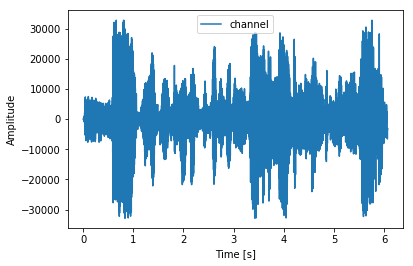

In [57]:
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data, label="channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

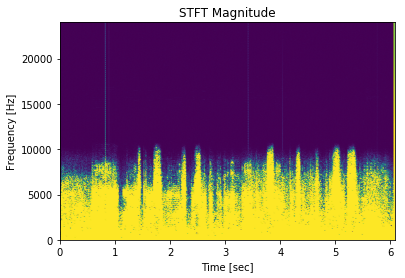

In [169]:
f, t, Zxx = signal.stft(data, samplerate, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=2, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

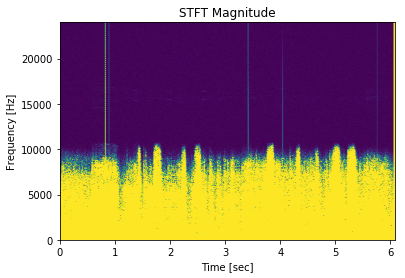

In [170]:
f, t, Zxx = signal.stft(data, samplerate, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx+noise), vmin=0, vmax=2, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [223]:
noise = Zxx
noise = np.exp(-np.abs(noise))*100

In [224]:
np.abs(noise.max())

99.99772

In [225]:
np.abs(Zxx.max())

8987.753

In [226]:
tt, xrec = signal.istft(Zxx+noise, samplerate)

In [227]:
tt.shape

(291500,)

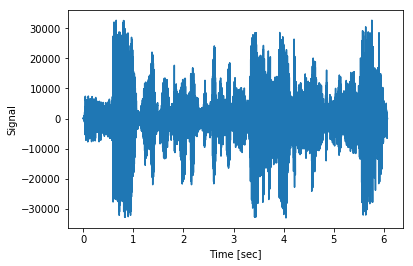

In [228]:
#plt.figure()
plt.plot(tt, xrec)
#plt.xlim([2, 2.1])
plt.xlabel('Time [sec]')
plt.ylabel('Signal')
#plt.legend(['Carrier + Noise', 'Filtered via STFT', 'True Carrier'])
plt.show()

In [230]:
wavfile.write('./test/MORESOUND_res.wav', samplerate, xrec)

In [231]:
'''
Nice noise!
Now for all dataset
'''

In [249]:
import os
from tqdm import tqdm

dir = "test"

for image in tqdm(os.listdir(dir)):
    path = os.path.join(dir,image)
    #print(path)
    
    samplerate, data = wavfile.read(path)
    f, t, Zxx = signal.stft(data, samplerate, nperseg=1000)
    noise = Zxx
    noise = np.exp(-np.abs(noise))*100
    per = np.abs(noise.max())/np.abs(Zxx.max())*100
    if(per > 10):
        noise = noise/10
        per = np.abs(noise.max())/np.abs(Zxx.max())*100
    print(per, "% of max noise")
    tt, xrec = signal.istft(Zxx+noise, samplerate)
    wavfile.write('noise_'+image, samplerate, xrec)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.93it/s]

1.1121168732643127 % of max noise
